# Tf-Idf (Term Frequency – Inverse Document Frequency)
 
It is a **numerical statistic** used in NLP to represent text by measuring **how important a word is in a document relative to a collection of documents (corpus)**.

### Why TF-IDF is Needed

- Some words appear **very frequently** (e.g., *is, the, and*)
- High frequency ≠ High importance
- TF-IDF reduces the weight of **common words**
- TF-IDF increases the weight of **rare but meaningful words**
- Helps machines understand **which words matter most**


### Components of TF-IDF

#### 🔹 Term Frequency (TF)

Measures how often a word appears in a document.

**Formula:**

TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d)


**Example:**
Document: "AI is the future of AI"
TF(AI) = 2 / 6


#### 🔹 Inverse Document Frequency (IDF)

Measures how **rare** a word is across all documents.

**Formula:**

IDF(t) = log( Total number of documents) / Number of documents containing term t )


- Common word → Low IDF
- Rare word → High IDF


### TF-IDF Formula

TF-IDF(t, d) = TF(t, d) × IDF(t)

### Example
Doc1: "AI is amazing"
Doc2: "AI is future"
Doc3: "AI is powerful"


- Word **"AI"** appears in all documents → IDF is low
- Word **"amazing"** appears once → IDF is high

-> TF-IDF gives **higher weight to "amazing"** than "AI"


### Key Properties

✔ Simple & efficient  ✔ Improves text relevance  ✔ Works well for small & medium datasets ✔ No training required  
❌ Ignores word order  ❌ No semantic meaning  ❌ Cannot handle synonyms  ❌ High dimensionality  

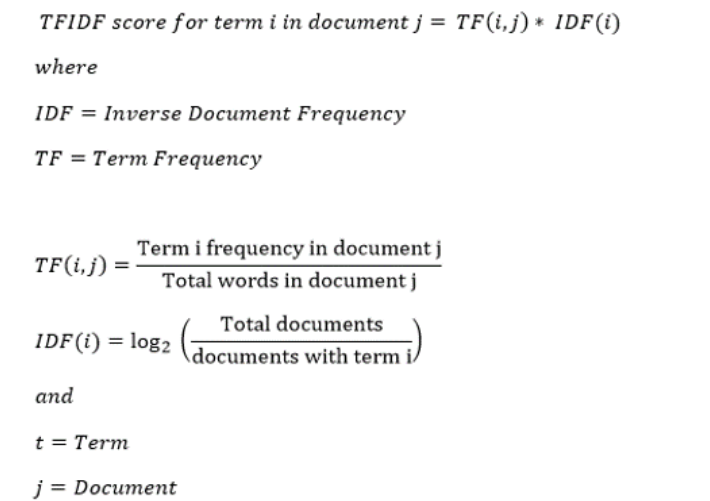


In [2]:
import re
import nltk

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
paragraph = '''
Machine Learning (ML) is a branch of Artificial Intelligence that enables systems to learn from data and make predictions or decisions without explicit programming.
What is Machine Learning?
Machine Learning is a subset of Artificial Intelligence (AI) that focuses on developing algorithms and statistical models that allow computers to perform specific tasks without using explicit instructions. Instead, they rely on patterns and inference derived from data. This capability enables machines to improve their performance over time as they are exposed to more data. 
Types of Machine Learning
Supervised Learning: In this approach, models are trained on labeled data, meaning the input data is paired with the correct output. The model learns to predict outcomes based on this training. Common algorithms include Linear Regression and Decision Trees.
Unsupervised Learning: This type involves training models on data without labeled responses. The model tries to find patterns or groupings in the data. Clustering algorithms, such as K-means, are examples of unsupervised learning.
Reinforcement Learning: Here, an agent learns to make decisions by taking actions in an environment to maximize cumulative rewards. This approach is often used in robotics and game playing.
Semi-Supervised and Self-Supervised Learning: These methods combine labeled and unlabeled data to improve learning efficiency, especially when labeling data is costly. 
'''

In [6]:
sentences = nltk.sent_tokenize(paragraph)

In [7]:
corpus = []
for sentence in sentences:
    review = re.sub('[^a-zA-Z]', ' ', sentence)  #⚠ Regex [a-zA-Z] removes Unicode characters -> Use \w and \s for real-world NLP text
    review = review.lower()
    review = review.split()

    review = [
        word for word in review 
        if word not in stopwords.words('english')
    ]
    
    review = ' '.join(review)
    corpus.append(review)

In [17]:
cv = TfidfVectorizer()
# cv = TfidfVectorizer(ngram_range=(3, 3)) #trigram
x = cv.fit_transform(corpus)

In [15]:
corpus[0]

'machine learning ml branch artificial intelligence enables systems learn data make predictions decisions without explicit programming'

In [16]:
x[0].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.26726124, 0.26726124, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.26726124, 0.        ,
        0.        , 0.        , 0.        , 0.26726124, 0.        ,
        0.        , 0.        , 0.26726124, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.26726124, 0.        , 0.        , 0.        , 0.        ,
        0.26726124, 0.        , 0.        , 0.        , 0.        ,
        0.26726124, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26726124, 0.        , 0.        ,
        0.        , 0.        , 0.26726124, 0.        , 0.        ,
        0.        , 0.        , 0.26726124, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  